In [346]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy import interp
import seaborn as sns
sns.set()

In [347]:
# 加载数据
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [348]:
# 将标签二值化
y = label_binarize(y, classes=[0, 1, 2])

# 设置种类
n_classes = y.shape[1]

# 训练模型并预测
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

## SVM

In [349]:
# # Learn to predict each class against the other
# model = svm.SVC(kernel='linear', probability=True, random_state=random_state)
# classifier = OneVsRestClassifier(model)
# y_score = classifier.fit(X_train, y_train).decision_function(X_test)

## RandomForest

In [350]:
# Learn to predict each class against the other
model = RandomForestClassifier(n_estimators=500, random_state=0)
classifier = OneVsRestClassifier(model)

pred = classifier.fit(X_train, y_train).predict(X_test).argmax(axis=1)
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

In [351]:
pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0], dtype=int64)

## 交叉验证

c:\Program Files\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


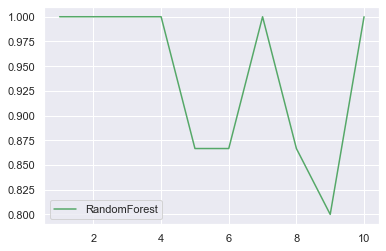

In [352]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = classifier
rfc_c = cross_val_score(classifier, X, y, cv=10)

sns.lineplot(range(1, 11), rfc_c, label="RandomForest", color='g')

plt.legend()
plt.show()

## ConfusionMatrix

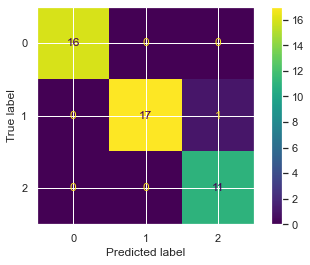

In [353]:
yhat = classifier.predict(X_test)
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test.argmax(axis=1), yhat.argmax(axis=1))
plt.show()

## ROC plot

In [354]:
# 计算每一类的ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [355]:
# Compute micro-average ROC curve and ROC area（方法二）
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area（方法一）
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# Finally average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

C:\Users\Administrator\AppData\Local\Temp/ipykernel_70744/3799444529.py:11: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  mean_tpr += interp(all_fpr, fpr[i], tpr[i])


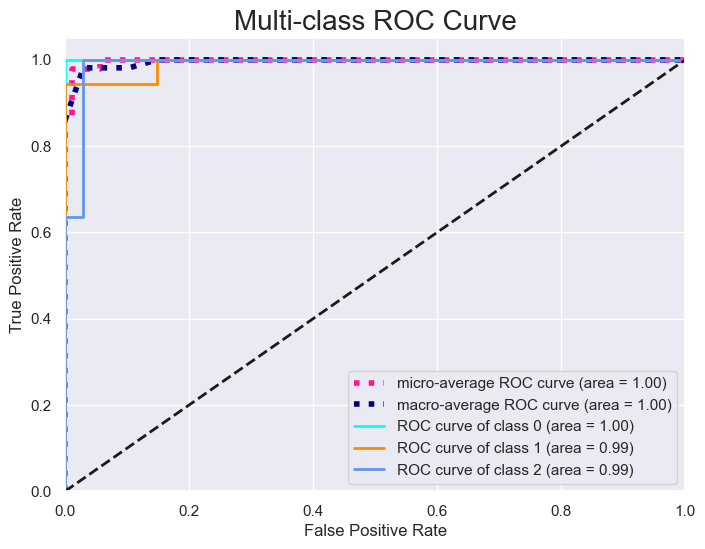

In [356]:
# Plot all ROC curves
lw = 2
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color = color, lw = lw,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()